### Importing and Understanding Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries for data manipulation
import numpy as np
import pandas as pd
# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
# Importing RFE - LinearRegression - Split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Import dataset
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observations: 
 - **instant**: variable has not a predictive power, we can drop it
 - **dteday** : variable has not a predictive power, we can drop it


In [6]:
#Drop ['instant'], ['dteday'] variables
df = df.drop(['instant', 'dteday'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [7]:
# identify null variables
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observations:
**data frame has not null variables**

In [8]:
# Identify Duplicate Rows
df_2 = df.copy()
df_2.drop_duplicates(subset=None, inplace=True)
df_2.shape

(730, 14)

Observations: **Data Frame has not duplicate Rows**

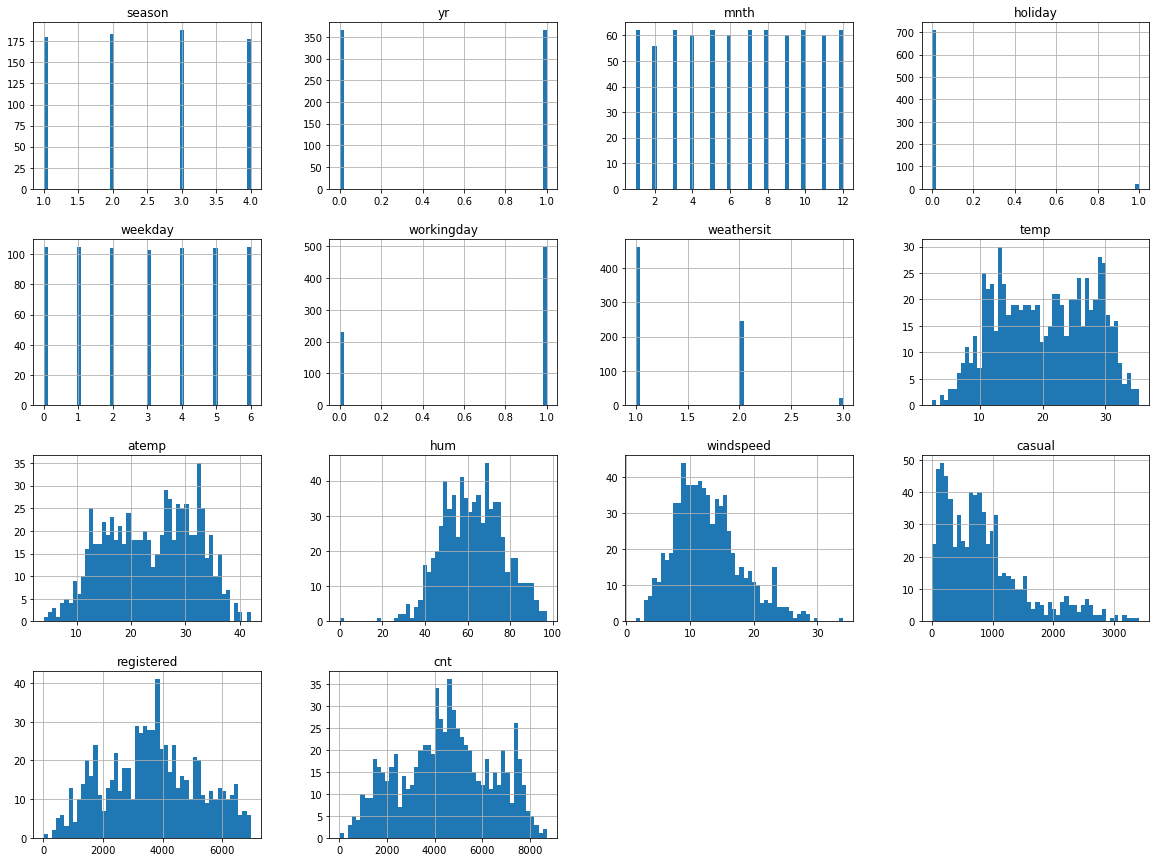

In [9]:
# Plot Data Frame and feel a categorical variables types.
df.hist(bins=50, figsize=(20,15))
plt.show()

Observations:
We can identify Categorival Variables:
 - season,  yr, mnth, holiday, weekday, workingday, weathersit.

In [10]:
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['yr']=df['yr'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['holiday']=df['holiday'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.5 KB


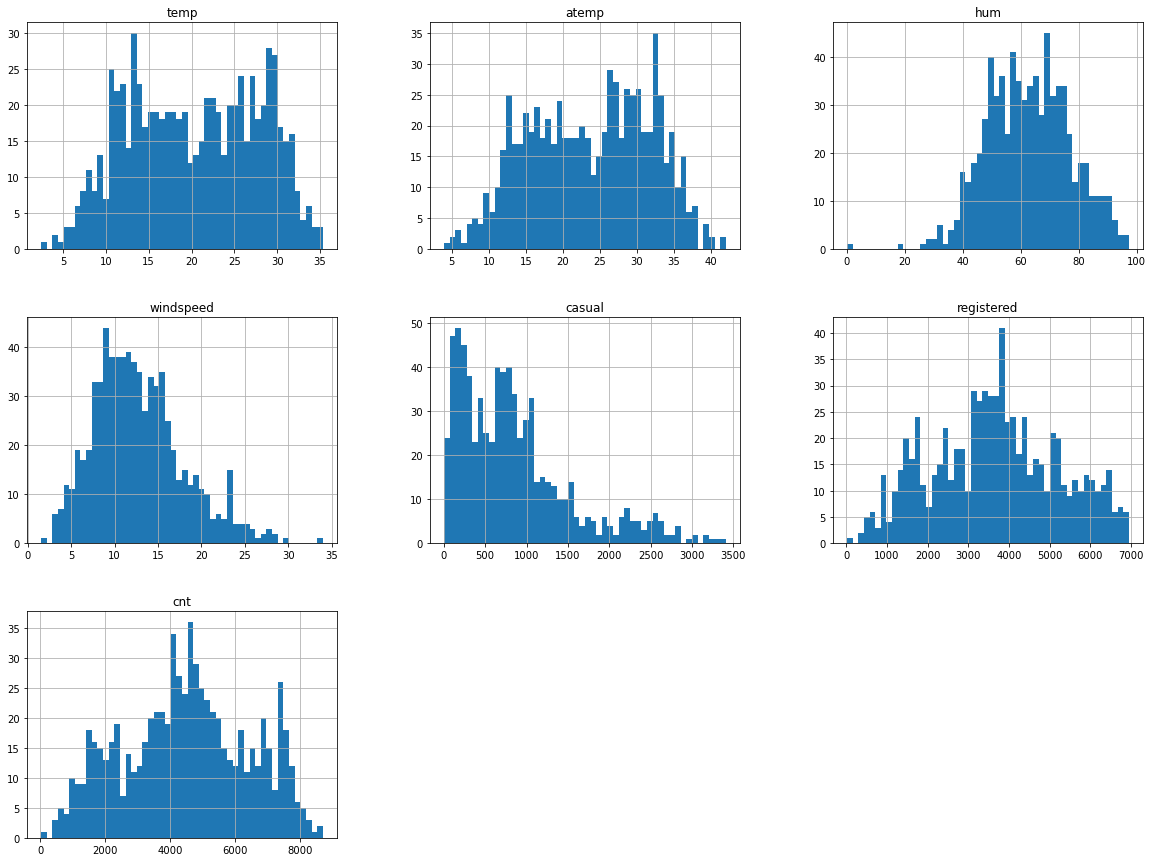

In [12]:
# Plot Data Frame:  Numerical Variables
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


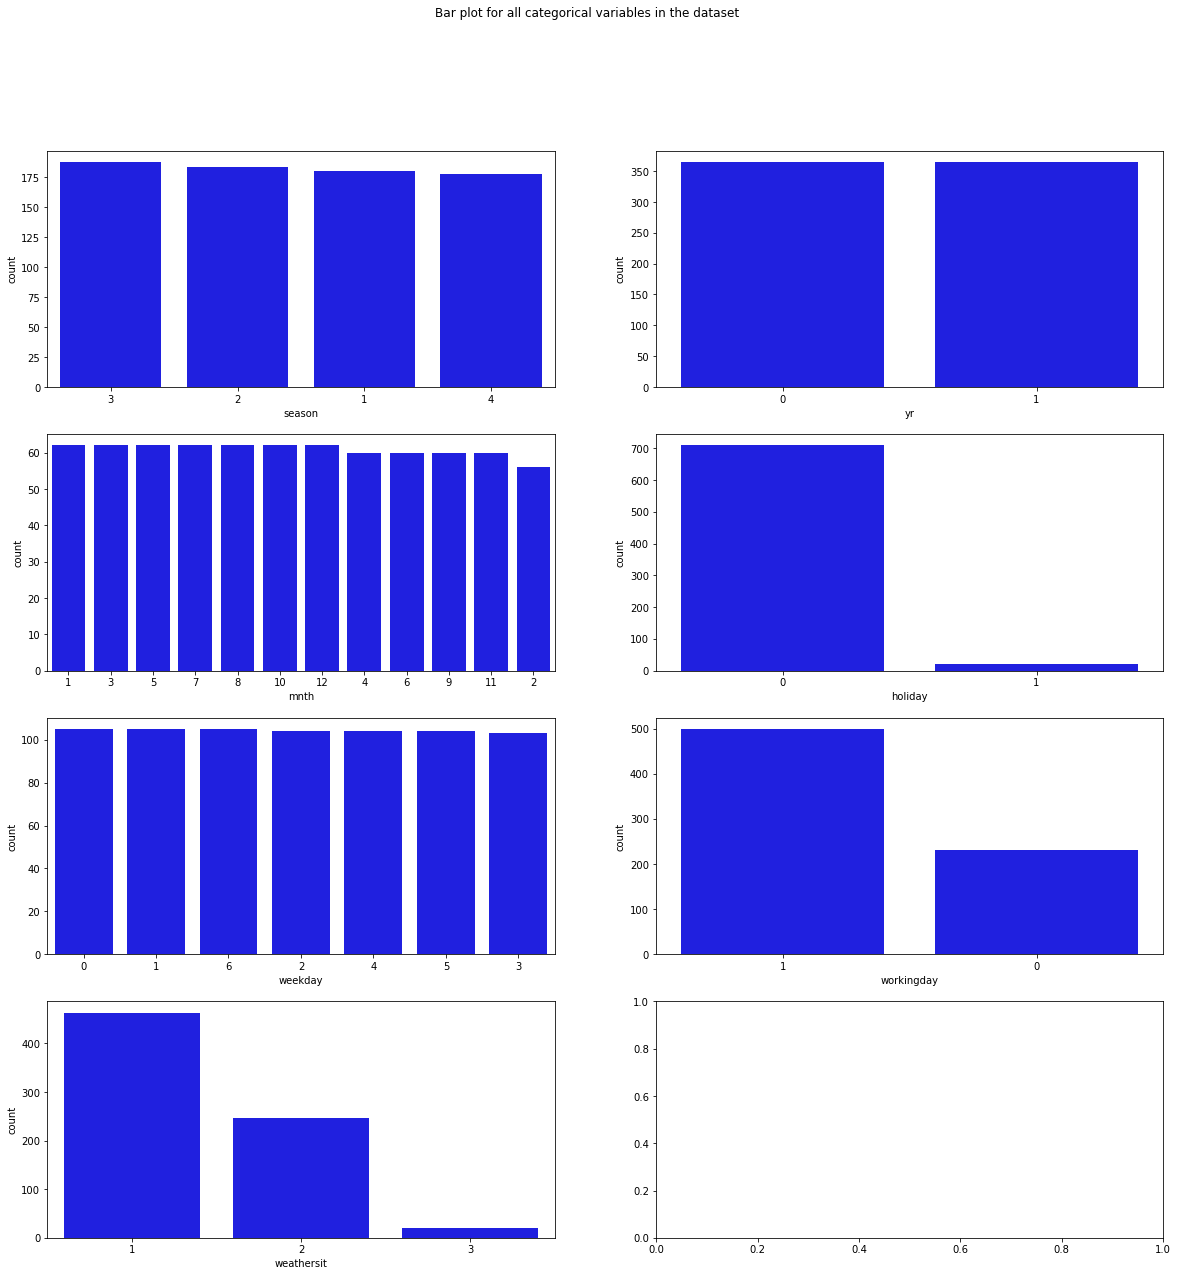

In [14]:
fig, axes = plt.subplots(4, 2,figsize=(20, 20))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax=axes[0, 0], x='season', data=df, color='blue', 
              order=df['season'].value_counts().index, );
sns.countplot(ax=axes[0, 1], x='yr', data=df, color='blue', 
              order=df['yr'].value_counts().index);
sns.countplot(ax=axes[1, 0], x='mnth', data=df, color='blue', 
              order=df['mnth'].value_counts().index);
sns.countplot(ax=axes[1, 1], x='holiday', data=df, color='blue', 
              order=df['holiday'].value_counts().index);
sns.countplot(ax=axes[2, 0], x='weekday', data=df, color='blue', 
              order=df['weekday'].value_counts().index);
sns.countplot(ax=axes[2, 1], x='workingday', data=df, color='blue', 
              order=df['workingday'].value_counts().index);
sns.countplot(ax=axes[3, 0], x='weathersit', data=df, color='blue', 
              order=df['weathersit'].value_counts().index);

In [15]:
# we to eliminate other not important variables to model
#Drop ['casual'], ['registered'] variables
df = df.drop(['casual', 'registered'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


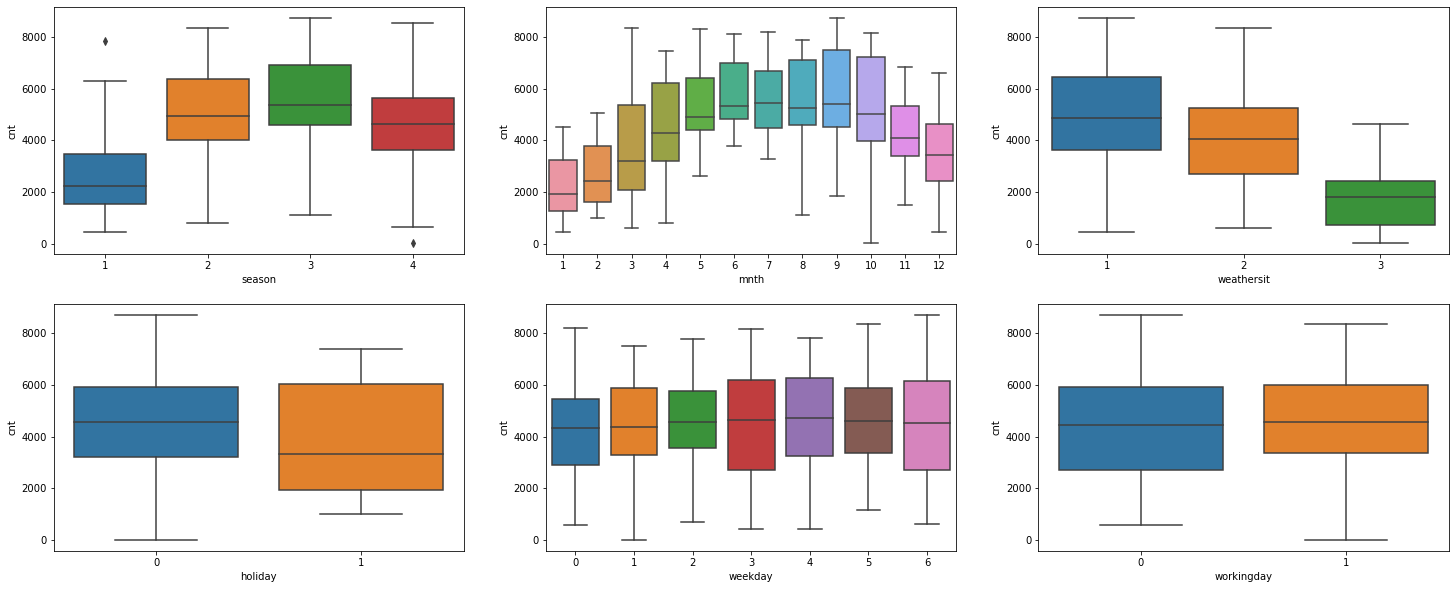

In [16]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

In [17]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   season_2      730 non-null    uint8  
 6   season_3      730 non-null    uint8  
 7   season_4      730 non-null    uint8  
 8   yr_1          730 non-null    uint8  
 9   mnth_2        730 non-null    uint8  
 10  mnth_3        730 non-null    uint8  
 11  mnth_4        730 non-null    uint8  
 12  mnth_5        730 non-null    uint8  
 13  mnth_6        730 non-null    uint8  
 14  mnth_7        730 non-null    uint8  
 15  mnth_8        730 non-null    uint8  
 16  mnth_9        730 non-null    uint8  
 17  mnth_10       730 non-null    uint8  
 18  mnth_11       730 non-null    

In [18]:
df.shape

(730, 30)

In [19]:
df.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.500000,0.076712,...,0.028767,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.683562,0.336986,0.028767
std,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.500343,0.266317,...,0.167266,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.465405,0.473004,0.167266
min,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Split DataFrame into Train and Test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [21]:
df_train.shape

(510, 30)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          510 non-null    float64
 1   atemp         510 non-null    float64
 2   hum           510 non-null    float64
 3   windspeed     510 non-null    float64
 4   cnt           510 non-null    int64  
 5   season_2      510 non-null    uint8  
 6   season_3      510 non-null    uint8  
 7   season_4      510 non-null    uint8  
 8   yr_1          510 non-null    uint8  
 9   mnth_2        510 non-null    uint8  
 10  mnth_3        510 non-null    uint8  
 11  mnth_4        510 non-null    uint8  
 12  mnth_5        510 non-null    uint8  
 13  mnth_6        510 non-null    uint8  
 14  mnth_7        510 non-null    uint8  
 15  mnth_8        510 non-null    uint8  
 16  mnth_9        510 non-null    uint8  
 17  mnth_10       510 non-null    uint8  
 18  mnth_11       510 non-null  

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
# Checking values after scaling
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
483,-0.190954,-0.133896,-0.250264,-0.946034,0.926490,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
650,-0.546695,-0.495089,-0.892777,-0.569618,1.339833,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
212,1.523904,1.423253,-0.502060,-0.433454,-0.119961,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
714,-0.715442,-0.627068,1.497837,-1.154187,-0.366426,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
8,-1.942294,-2.187858,-1.312432,2.209121,-1.888349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,6.530724e-18,-2.220446e-17,6.043096e-16,1.393221e-17,-1.354037e-16,0.247059,0.262745,0.241176,0.501961,0.082353,...,0.023529,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.682353,0.341176,0.025490
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.431725,0.440557,0.428217,0.500487,0.275172,...,0.151726,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.466018,0.474570,0.157763
min,-2.375765e+00,-2.416078e+00,-4.328195e+00,-2.163024e+00,-2.299125e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.682270e-01,-8.425969e-01,-7.437246e-01,-7.216025e-01,-6.947896e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.677549e-03,4.660800e-02,-6.834883e-03,-1.291820e-01,5.325987e-03,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.762693e-01,8.281823e-01,7.388312e-01,5.494334e-01,7.619232e-01,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.016468e+00,2.269597e+00,2.357416e+00,4.082743e+00,2.163952e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


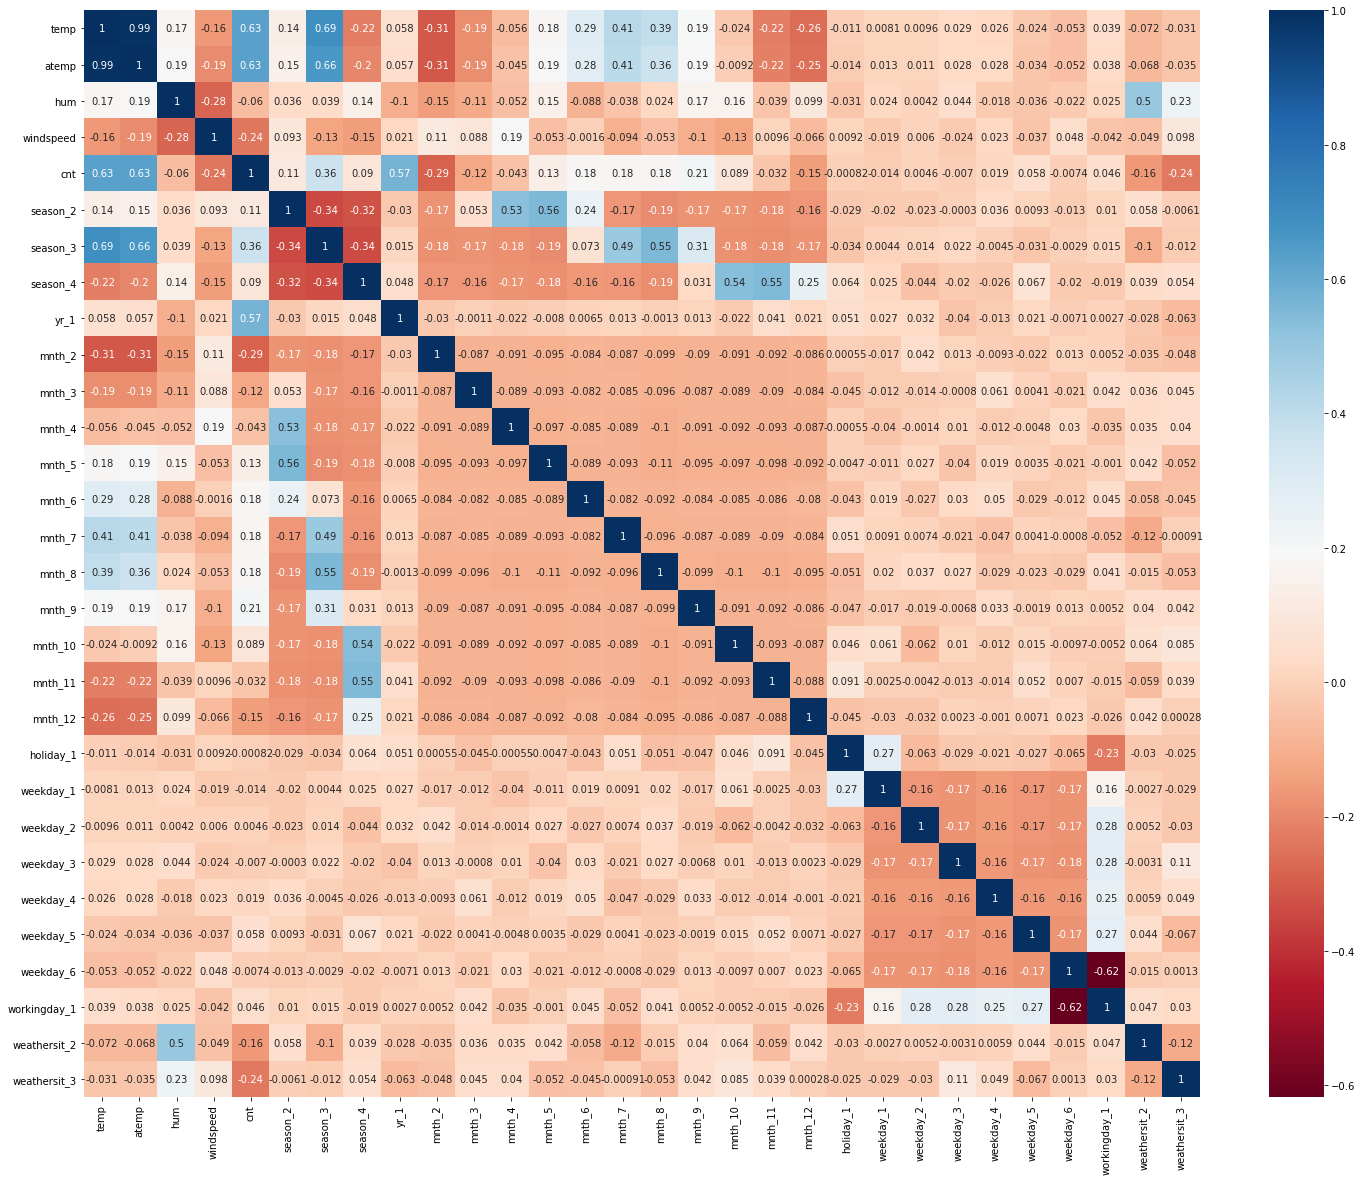

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

NumExpr defaulting to 8 threads.


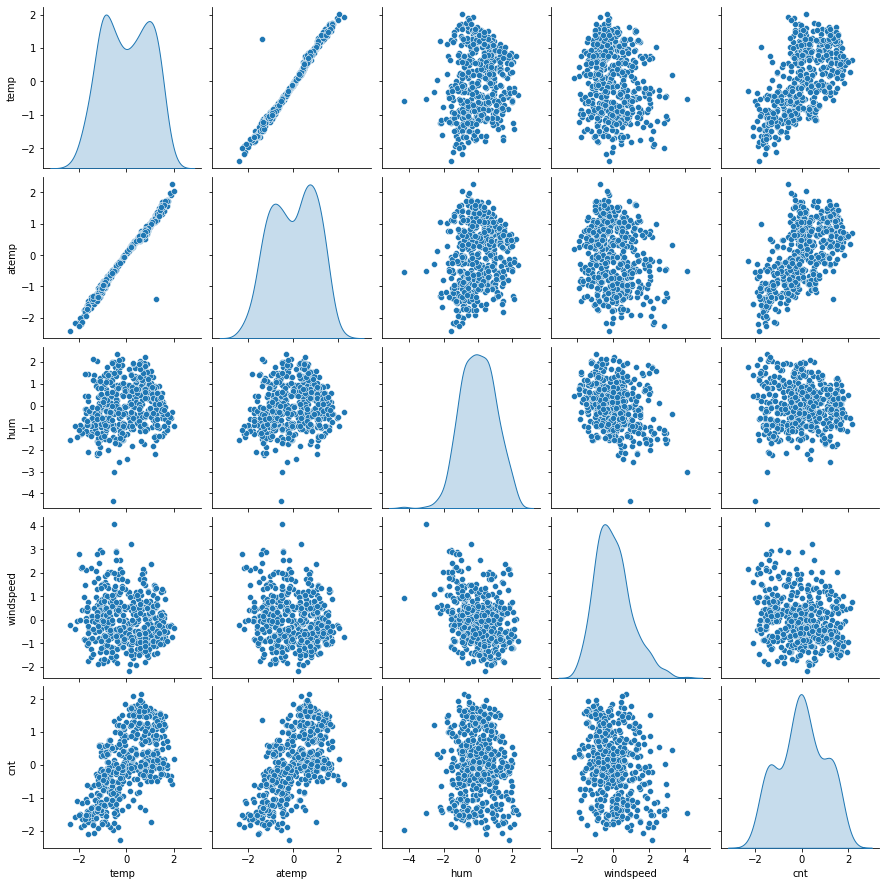

In [27]:
# Create a new dataframe of only numeric variables:
df_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(df_num, diag_kind='kde')
plt.show()

In [28]:
#Build a linear model with all variables
y_train = df_train.pop('cnt')
X_train = df_train

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 29
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,29)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('holiday_1', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [33]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [35]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          4.67e-176
Time:                        22:51:30   Log-Likelihood:                -245.84
No. Observations:                 510   AIC:                             549.7
Df Residuals:                     481   BIC:                             672.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1166      0.104    -10.708   

In [36]:
# without a 'atemp' variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.10e-177
Time:                        22:51:30   Log-Likelihood:                -246.12
No. Observations:                 510   AIC:                             548.2
Df Residuals:                     482   BIC:                             666.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1136      0.104    -10.693   

In [37]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,holiday_1,inf
26,workingday_1,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
...,...,...
25,weekday_6,1.77
27,weathersit_2,1.62
28,weathersit_3,1.28
3,windspeed,1.24


In [38]:
X_train_new = X_train_new.drop(["mnth_2"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.29e-178
Time:                        22:51:30   Log-Likelihood:                -246.48
No. Observations:                 510   AIC:                             547.0
Df Residuals:                     483   BIC:                             661.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0688      0.088    -12.092   

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,holiday_1,inf
25,workingday_1,inf
23,weekday_5,inf
22,weekday_4,inf
21,weekday_3,inf
...,...,...
24,weekday_6,1.77
26,weathersit_2,1.62
27,weathersit_3,1.28
3,windspeed,1.24


In [40]:
X_train_new = X_train_new.drop(["mnth_4"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.14e-178
Time:                        22:51:30   Log-Likelihood:                -246.85
No. Observations:                 510   AIC:                             545.7
Df Residuals:                     484   BIC:                             655.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0414      0.082    -12.662   

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday_1,inf
22,weekday_5,inf
21,weekday_4,inf
20,weekday_3,inf
19,weekday_2,inf
...,...,...
25,weathersit_2,1.62
26,weathersit_3,1.28
8,mnth_3,1.26
3,windspeed,1.24


In [42]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.74e-179
Time:                        22:51:30   Log-Likelihood:                -247.86
No. Observations:                 510   AIC:                             545.7
Df Residuals:                     485   BIC:                             651.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0022      0.077    -12.972   

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,workingday_1,inf
21,weekday_5,inf
20,weekday_4,inf
19,weekday_3,inf
18,weekday_2,inf
...,...,...
24,weathersit_2,1.61
25,weathersit_3,1.28
3,windspeed,1.22
8,mnth_3,1.19


In [44]:
X_train_new = X_train_new.drop(["mnth_6"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.92e-180
Time:                        22:51:31   Log-Likelihood:                -248.01
No. Observations:                 510   AIC:                             544.0
Df Residuals:                     486   BIC:                             645.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0131      0.075    -13.590   

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,workingday_1,inf
20,weekday_5,inf
19,weekday_4,inf
18,weekday_3,inf
17,weekday_2,inf
...,...,...
23,weathersit_2,1.60
24,weathersit_3,1.27
3,windspeed,1.21
8,mnth_3,1.16


In [46]:
X_train_new = X_train_new.drop(["mnth_7"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.48e-181
Time:                        22:51:31   Log-Likelihood:                -249.25
No. Observations:                 510   AIC:                             544.5
Df Residuals:                     487   BIC:                             641.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0340      0.073    -14.085   

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,workingday_1,inf
19,weekday_5,inf
18,weekday_4,inf
17,weekday_3,inf
16,weekday_2,inf
...,...,...
22,weathersit_2,1.60
23,weathersit_3,1.27
3,windspeed,1.21
8,mnth_3,1.16


In [48]:
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.14e-181
Time:                        22:51:31   Log-Likelihood:                -249.70
No. Observations:                 510   AIC:                             543.4
Df Residuals:                     488   BIC:                             636.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0338      0.073    -14.085   

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,workingday_1,inf
18,weekday_5,inf
17,weekday_4,inf
16,weekday_3,inf
15,weekday_2,inf
...,...,...
9,mnth_9,1.45
22,weathersit_3,1.27
3,windspeed,1.21
8,mnth_3,1.16


In [50]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.96e-182
Time:                        22:51:31   Log-Likelihood:                -250.42
No. Observations:                 510   AIC:                             542.8
Df Residuals:                     489   BIC:                             631.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0275      0.073    -14.031   

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weekday_4,inf
19,workingday_1,inf
17,weekday_5,inf
12,holiday_1,inf
13,weekday_1,inf
...,...,...
21,weathersit_3,1.26
9,mnth_9,1.21
3,windspeed,1.21
8,mnth_3,1.16


In [52]:
X_train_new = X_train_new.drop(["holiday_1"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.96e-182
Time:                        22:51:31   Log-Likelihood:                -250.42
No. Observations:                 510   AIC:                             542.8
Df Residuals:                     489   BIC:                             631.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0275      0.073    -14.031   

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.78
18,workingday_1,10.42
14,weekday_3,7.77
13,weekday_2,7.59
16,weekday_5,7.58
...,...,...
20,weathersit_3,1.26
9,mnth_9,1.21
3,windspeed,1.21
8,mnth_3,1.16


In [54]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     139.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.00e-183
Time:                        22:51:31   Log-Likelihood:                -250.64
No. Observations:                 510   AIC:                             541.3
Df Residuals:                     490   BIC:                             626.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0400      0.071    -14.744   

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.58
5,season_3,5.37
1,temp,3.90
6,season_4,2.98
17,workingday_1,2.90
...,...,...
19,weathersit_3,1.26
9,mnth_9,1.21
3,windspeed,1.21
8,mnth_3,1.15


In [56]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          3.26e-184
Time:                        22:51:31   Log-Likelihood:                -251.36
No. Observations:                 510   AIC:                             540.7
Df Residuals:                     491   BIC:                             621.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0354      0.070    -14.695   

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.54
5,season_3,5.35
1,temp,3.90
6,season_4,2.97
4,season_2,2.68
...,...,...
18,weathersit_3,1.26
3,windspeed,1.21
9,mnth_9,1.21
8,mnth_3,1.15


In [58]:
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.10e-184
Time:                        22:51:31   Log-Likelihood:                -252.88
No. Observations:                 510   AIC:                             541.8
Df Residuals:                     492   BIC:                             618.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0329      0.071    -14.634   

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.53
5,season_3,5.35
1,temp,3.89
6,season_4,2.97
4,season_2,2.68
...,...,...
9,mnth_9,1.21
13,weekday_5,1.17
12,weekday_4,1.15
8,mnth_3,1.15


In [60]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.27e-185
Time:                        22:51:31   Log-Likelihood:                -253.30
No. Observations:                 510   AIC:                             540.6
Df Residuals:                     493   BIC:                             612.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0331      0.071    -14.638   

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.53
5,season_3,5.35
1,temp,3.89
6,season_4,2.97
4,season_2,2.68
...,...,...
9,mnth_9,1.21
3,windspeed,1.21
8,mnth_3,1.15
12,weekday_5,1.10


In [62]:
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.47e-186
Time:                        22:51:31   Log-Likelihood:                -253.76
No. Observations:                 510   AIC:                             539.5
Df Residuals:                     494   BIC:                             607.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0364      0.070    -14.706   

In [63]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_3', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [64]:
X_train_new = X_train_new.drop(["const"], axis = 1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_3,4.28
12,workingday_1,3.56
0,temp,3.05
5,season_4,2.84
13,weathersit_2,2.36
...,...,...
10,mnth_12,1.43
8,mnth_9,1.31
14,weathersit_3,1.27
7,mnth_3,1.21


In [65]:
y_train_predict = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

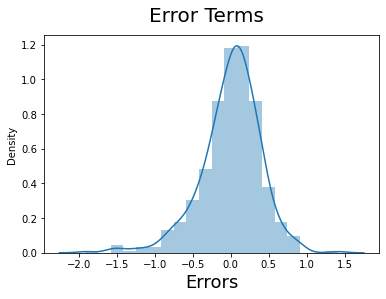

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [76]:
residual = lm.resid # Residuals
residual.mean()

4.075171572741751e-16

<AxesSubplot:ylabel='Count'>

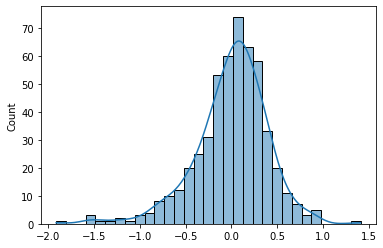

In [77]:
# Plot histogram of residuals
sns.histplot(residual, kde=True)

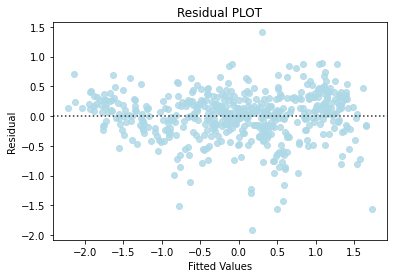

In [78]:
# predicted values
fitted = lm.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train,X_train_lm)
lzip(name, test)

[('F statistic', 1.1172249067018223), ('p-value', 0.19607673746622029)]

As we can see from the above test the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means - residuals are homoscedastic.

In [67]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict) 

0.8416164006145421

In [68]:
#Predict with model using test dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
22,-2.204237,-2.333558,-1.459415,0.725629,-1.859110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,-0.035426,0.043001,-0.977813,0.004511,1.534928,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
553,1.747069,1.889740,-0.464019,-0.840995,0.073300,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
504,0.649449,0.629090,-0.778339,0.826215,1.361399,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
353,-0.629593,-0.516041,-0.306856,-1.670574,-0.410065,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
X_train_new.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [71]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_ = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_ = sm.add_constant(X_test_)

In [72]:
# Making predictions
y_test_pred = lm.predict(X_test_)

Text(0, 0.5, 'y_pred')

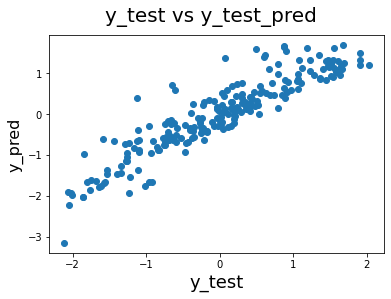

In [73]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred) 

0.8355660604276873